In [12]:
import urllib, json
import numpy as np

url = "https://s3.amazonaws.com/cttransit-realtime-prod/vehiclepositions_pb.json"
response = urllib.request.urlopen(url)
data = json.loads(response.read())

print(np.shape(data['entity'])[0])
locations = np.ones([2,np.shape(data['entity'])[0]])
speeds = np.ones([1,np.shape(data['entity'])[0]])
stops = np.ones([1,np.shape(data['entity'])[0]])
for i in range(np.shape(data['entity'])[0]):
    print(i)
    locations[0][i] = data['entity'][i]['vehicle']['position']['latitude']
    locations[1][i] = data['entity'][i]['vehicle']['position']['longitude']
    speeds[0][i] = data['entity'][i]['vehicle']['position']['speed']
  #  stops[i] = data['entity'][0]['vehicle']['current_status']
print(speeds)

0
[]


<AxesSubplot:>

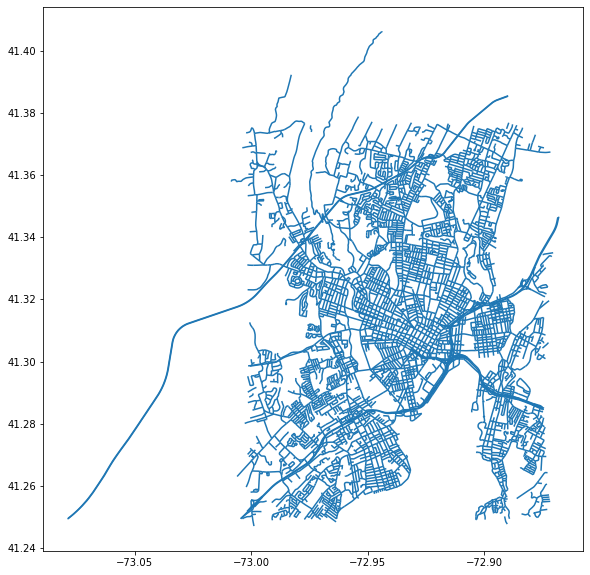

In [174]:
import geopandas as gpd
map = gpd.read_file('Trans_RoadSegment.shp')
fig,ax = plt.subplots(figsize=(10,10))
map.plot(ax=ax)

In [128]:
url2 = 'https://gist.githubusercontent.com/camille-s/c8cfa583ef22105e90d53ceb299f1a7b/raw/fc087f30ddb2658a05fb5408f1e9d5276b8a433d/nhv.json'
response2 = urllib.request.urlopen(url2)
data2 = json.loads(response2.read())


In [132]:
edgewood_locs = np.ones([2,np.shape(data2['features'][0]['geometry']['coordinates'][0])[0]])
locs2 = np.ones([2,np.shape(data2['features'][1]['geometry']['coordinates'][0])[0]])
locs3 = np.ones([2,np.shape(data2['features'][2]['geometry']['coordinates'][0])[0]])
locs4 = np.ones([2,np.shape(data2['features'][3]['geometry']['coordinates'][0])[0]])
locs5 = np.ones([2,np.shape(data2['features'][4]['geometry']['coordinates'][0])[0]])
locs6 = np.ones([2,np.shape(data2['features'][5]['geometry']['coordinates'][0])[0]])
locs7 = np.ones([2,np.shape(data2['features'][6]['geometry']['coordinates'][0])[0]])
locs8 = np.ones([2,np.shape(data2['features'][7]['geometry']['coordinates'][0])[0]])
locs9 = np.ones([2,np.shape(data2['features'][8]['geometry']['coordinates'][0])[0]])
locs10 = np.ones([2,np.shape(data2['features'][9]['geometry']['coordinates'][0])[0]])
locs11 = np.ones([2,np.shape(data2['features'][10]['geometry']['coordinates'][0])[0]])
locs12 = np.ones([2,np.shape(data2['features'][11]['geometry']['coordinates'][0])[0]])
locs13 = np.ones([2,np.shape(data2['features'][12]['geometry']['coordinates'][0])[0]])
locs14 = np.ones([2,np.shape(data2['features'][13]['geometry']['coordinates'][0])[0]])
locs15 = np.ones([2,np.shape(data2['features'][14]['geometry']['coordinates'][0])[0]])
locs16 = np.ones([2,np.shape(data2['features'][15]['geometry']['coordinates'][0])[0]])
locs17 = np.ones([2,np.shape(data2['features'][16]['geometry']['coordinates'][0])[0]])
locs18 = np.ones([2,np.shape(data2['features'][17]['geometry']['coordinates'][0])[0]])
locs19 = np.ones([2,np.shape(data2['features'][18]['geometry']['coordinates'][0])[0]])
locs20 = np.ones([2,np.shape(data2['features'][19]['geometry']['coordinates'][0])[0]])
locsx = np.ones([2,1727])

names = [edgewood_locs, locs2, locs3, locs4, locs5, locs6, locs7, locs8, locs9, locs10, locs11, locs12, locs13, locs14, locs15, locs16, locs17, locs18, locs19, locs20]


#print(data2['features'][0]['geometry'])

print(data2['features'][15]['geometry']['coordinates'][0][0][0])
counter=-1
for j in range(0,20):
    print(j)
    for i in range(np.shape(data2['features'][j]['geometry']['coordinates'][0])[0]):
        counter=counter+1
        names[j][0][i] = data2['features'][j]['geometry']['coordinates'][0][i][0]
        names[j][1][i] = data2['features'][j]['geometry']['coordinates'][0][i][1]
        locsx[0][counter] = data2['features'][j]['geometry']['coordinates'][0][i][0]
        locsx[1][counter] = data2['features'][j]['geometry']['coordinates'][0][i][1]
print(counter)

-72.918439
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
1726


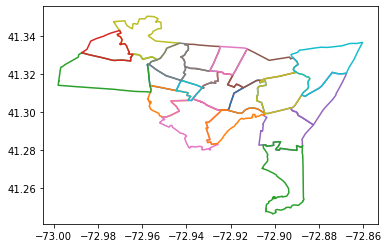

In [156]:
for i in names:
    plt.plot(i[0],i[1])

[[-72.95765  -72.95762  -72.957476 ... -72.889951 -72.890299 -72.891374]
 [ 41.324757  41.324989  41.325242 ...  41.320718  41.320984  41.321845]]


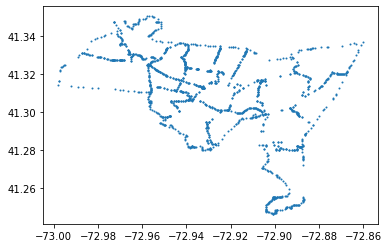

In [137]:
print(locsx)
plt.scatter(locsx[0],locsx[1],s=1)

[-72.95765  -72.95762  -72.957476 -72.957288 -72.956938 -72.956419
 -72.95629  -72.955987 -72.955485 -72.954694 -72.954298 -72.954129
 -72.953731 -72.953436 -72.952961 -72.952858 -72.952668 -72.952098
 -72.951813 -72.950987 -72.950414 -72.950156 -72.949343 -72.949091
 -72.948611 -72.947545 -72.946006 -72.944563 -72.94452  -72.94388
 -72.943551 -72.942412 -72.942916 -72.943043 -72.943436 -72.943838
 -72.944169 -72.944601 -72.945536 -72.945828 -72.947002 -72.948622
 -72.950376 -72.952059 -72.952551 -72.952979 -72.9534   -72.956535
 -72.956587 -72.956711 -72.956809 -72.956977 -72.95699  -72.957045
 -72.957274 -72.957453 -72.95765 ]


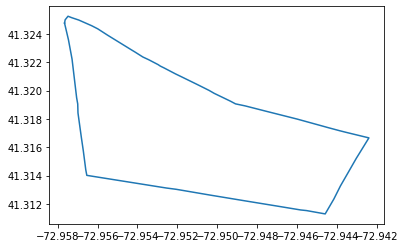

In [88]:
plt.plot(edgewood_locs[0],edgewood_locs[1]);
print(edgewood_locs[0])

(41.26, 41.355)

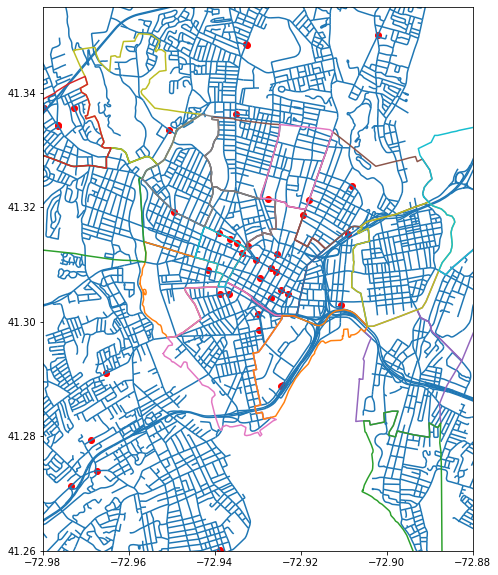

In [184]:
#print(locations)
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(10,10))
map.plot(ax=ax)
for i in names:
    ax.plot(i[0],i[1])
#plt.scatter(locsx[0],locsx[1],s=1)
ax.scatter(locations[1],locations[0],c='red')
plt.xlim(-72.98,-72.88)
plt.ylim(41.26,41.355)
#print(locations)